# 1. OpenCV-Python 시작하기

## 1) 영상파일 불러와서 출력하기

In [3]:
import cv2
import sys

print("Hello, OpenCV", cv2.__version__)

image = cv2.imread('./ch01/cat.bmp')  # cat.bmp 파일을 불러와서 image 변수에 할당

if image is None:  # 이미지가 경로에 없을 경우(불러오기 실패)
    print('Image load Failed!')  # 사용자 정의 에러 메세지 출력
    sys.exit()  # 파이썬 프로그램 종료

cv2.namedWindow('image')  # "image"라는 이름의 새 가상윈도우 창을 만든다.
cv2.imshow('image', image)  # 이 창에 image 영상을 출력한다.
cv2.waitKey()  # 키보드 입력을 받을때 까지 기다린다.
# 키보드 입력을 받았을 때
cv2.destroyAllWindows()  # 생성된 가상윈도우 창을 닫음
cv2.waitKey(1)
'''
NOTE : MAC OS 에서 OpenCV window를 닫기 위해 위 줄 처럼
cv2.destroyAllWindows() 함수를 실행해도 닫히지 않는 문제가 있다.
이를 해결하기 위해서 함수 아래에 cv2.waitKey(1)를 선언해주면
정상적으로 종료되는 것을 확인할 수 있다.
'''

Hello, OpenCV 4.5.4-dev


'\nNOTE : MAC OS 에서 OpenCV window를 닫기 위해 위 줄 처럼\ncv2.destroyAllWindows() 함수를 실행해도 닫히지 않는 문제가 있다.\n이를 해결하기 위해서 함수 아래에 cv2.waitKey(1)를 선언해주면 정상적으로 종료되는 것을 확인할 수 있다.\n'

## 2) OpenCV 주요 함수 설명

### OpenCV API 도움말 찾기
- OpenCV 최신 도움말 : <a href="https://docs.opencv.org/master"/>https://docs.opencv.org/master</a>
- OpenCV 도움말 사이트에서 우측 상단 검색창 활용

### 영상 파일 불러오기

In [62]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM files - \*.pfm (see the *Note* section)
    .   -   

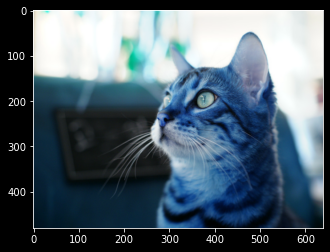

((480, 640, 3), dtype('uint8'))

In [39]:
import cv2
import matplotlib.pyplot as plt

# cv2.imread("filename", flags) -> return value
# filename : 불러올 영상 파일의 경로와 이름(+확장자)을 문자열로 입력
# flags : 영상 파일 불러오기 옵션
#       : cv2.IMREAD_COLOR -> BGR 컬러 영상으로 읽기(기본값) / shape = (rows, cols, 3)
#       : cv2.IMREAD_GRAYSCALE -> grayscalse 영상으로 읽기 / shape = (rows, cols)
#       : cv2.IMREAD_UNCHANGED -> 영상 파일 속성 그대로 읽기 / ex) 투명한 PNG 파일 : shape = (rows, cols, 4)
# return value : 불러온 영상 데이터(numpy.ndarray)

# "cat.bmp"라는 영상 파일을 불러온 후 출력해보기
# flags에 아무값도 전달하지 않으면 기본값인 BGR 컬러로 읽는다.
image = cv2.imread('./ch01/cat.bmp')
plt.imshow(image)
plt.show()

# .shape 는 행렬의 순서로 나타내기 때문에 480,640,3 으로 표현 되는 것을 볼 수 있다.
# 480행 : 480px 높이 / 640열 : 640px 너비 / 3채널(RGB)
image.shape, image.dtype

### 영상 파일 출력하기

In [18]:
help(cv2.imshow)

Help on built-in function imshow:

imshow(...)
    imshow(winname, mat) -> None
    .   @brief Displays an image in the specified window.
    .   
    .   The function imshow displays an image in the specified window. If the window was created with the
    .   cv::WINDOW_AUTOSIZE flag, the image is shown with its original size, however it is still limited by the screen resolution.
    .   Otherwise, the image is scaled to fit the window. The function may scale the image, depending on its depth:
    .   
    .   -   If the image is 8-bit unsigned, it is displayed as is.
    .   -   If the image is 16-bit unsigned, the pixels are divided by 256. That is, the
    .       value range [0,255\*256] is mapped to [0,255].
    .   -   If the image is 32-bit or 64-bit floating-point, the pixel values are multiplied by 255. That is, the
    .       value range [0,1] is mapped to [0,255].
    .   -   32-bit integer images are not processed anymore due to ambiguouty of required transform.
    .    

In [22]:
import cv2

# cv2.imread("window_name", image) -> None
# window_name : 영상을 출력할 대상 창 이름
# image : 출력할 영상 데이터(numpy.ndarray)
# 참고사항 : uint16, int32 자료형 행렬의 경우, 행렬 원소 값을 255로 나눠서 출력
#        : float32, float64 자료형 행렬의 경우, 행렬 원소 값에 255를 곱해서 출력
#        : 만약 winname에 해당하는 창이 없으면 창을 새로 만들어서 영상을 출력함
#        : Windows 운영체제에서는 Ctrl + C (복사), Ctrl + S (저장) 지원
#        : 실제로는 cv2.waitKey() 함수를 호출해야 화면에 영상이 나타남

# 가상 윈도우 창의 이름을 지정하지 않고 출력하기
image = cv2.imread('./ch01/cat.bmp')
cv2.imshow('', image)  # 창 이름을 입력하지 않을 시 이름 없는 새 창을 생성한다.
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 영상 파일 저장하기

In [64]:
help(cv2.imwrite)

Help on built-in function imwrite:

imwrite(...)
    imwrite(filename, img[, params]) -> retval
    .   @brief Saves an image to a specified file.
    .   
    .   The function imwrite saves the image to the specified file. The image format is chosen based on the
    .   filename extension (see cv::imread for the list of extensions). In general, only 8-bit
    .   single-channel or 3-channel (with 'BGR' channel order) images
    .   can be saved using this function, with these exceptions:
    .   
    .   - 16-bit unsigned (CV_16U) images can be saved in the case of PNG, JPEG 2000, and TIFF formats
    .   - 32-bit float (CV_32F) images can be saved in PFM, TIFF, OpenEXR, and Radiance HDR formats;
    .     3-channel (CV_32FC3) TIFF images will be saved using the LogLuv high dynamic range encoding
    .     (4 bytes per pixel)
    .   - PNG images with an alpha channel can be saved using this function. To do this, create
    .   8-bit (or 16-bit) 4-channel image BGRA, where the alpha c

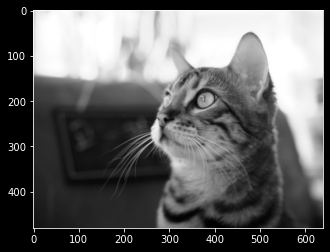

In [66]:
import cv2
import matplotlib.pyplot as plt

# cv2.imwrite("filename", image, params) -> return value
# filename : 저장할 영상 파일의 경로와 이름(+확장자)을 문자열로 입력
# image : 저장할 영상 데이터(numpy.ndarray)
# params : 파일 저장 옵션 지정(속성 & 값의 정수 쌍)
#        : ex) [cv2.IMWRITE_JPEG_QUALITY, 90] -> JPG 파일 압축률을 90%로 지정
# return value : 정상적으로 저장하면 True, 실패하면 False

# 이미지(영상) 파일을 grayscale로 불러와 "cat_gray.png"라고 저장한 후 다시 불러와 출력하기
image = cv2.imread('./ch01/cat.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('./ch01/cat_gray.png', image)

image_gray = cv2.imread('./ch01/cat_gray.png')

plt.imshow(image_gray)
plt.show()

### 새 창 띄우기 / 창 닫기 / 창 위치 이동 / 창 크기 변경 / 키보드 입력 대기

In [12]:
help(cv2.namedWindow)

Help on built-in function namedWindow:

namedWindow(...)
    namedWindow(winname[, flags]) -> None
    .   @brief Creates a window.
    .   
    .   The function namedWindow creates a window that can be used as a placeholder for images and
    .   trackbars. Created windows are referred to by their names.
    .   
    .   If a window with the same name already exists, the function does nothing.
    .   
    .   You can call cv::destroyWindow or cv::destroyAllWindows to close the window and de-allocate any associated
    .   memory usage. For a simple program, you do not really have to call these functions because all the
    .   resources and windows of the application are closed automatically by the operating system upon exit.
    .   
    .   @note
    .   
    .   Qt backend supports additional flags:
    .    -   **WINDOW_NORMAL or WINDOW_AUTOSIZE:** WINDOW_NORMAL enables you to resize the
    .        window, whereas WINDOW_AUTOSIZE adjusts automatically the window size to fit the

In [13]:
help(cv2.destroyWindow)

Help on built-in function destroyWindow:

destroyWindow(...)
    destroyWindow(winname) -> None
    .   @brief Destroys the specified window.
    .   
    .   The function destroyWindow destroys the window with the given name.
    .   
    .   @param winname Name of the window to be destroyed.



In [14]:
help(cv2.destroyAllWindows)

Help on built-in function destroyAllWindows:

destroyAllWindows(...)
    destroyAllWindows() -> None
    .   @brief Destroys all of the HighGUI windows.
    .   
    .   The function destroyAllWindows destroys all of the opened HighGUI windows.



In [15]:
help(cv2.moveWindow)

Help on built-in function moveWindow:

moveWindow(...)
    moveWindow(winname, x, y) -> None
    .   @brief Moves the window to the specified position
    .   
    .   @param winname Name of the window.
    .   @param x The new x-coordinate of the window.
    .   @param y The new y-coordinate of the window.



In [16]:
help(cv2.resizeWindow)

Help on built-in function resizeWindow:

resizeWindow(...)
    resizeWindow(winname, width, height) -> None
    .   @brief Resizes the window to the specified size
    .   
    .   @note
    .   
    .   -   The specified window size is for the image area. Toolbars are not counted.
    .   -   Only windows created without cv::WINDOW_AUTOSIZE flag can be resized.
    .   
    .   @param winname Window name.
    .   @param width The new window width.
    .   @param height The new window height.
    
    
    
    resizeWindow(winname, size) -> None
    .   @overload
    .   @param winname Window name.
    .   @param size The new window size.



In [17]:
help(cv2.waitKey)

Help on built-in function waitKey:

waitKey(...)
    waitKey([, delay]) -> retval
    .   @brief Waits for a pressed key.
    .   
    .   The function waitKey waits for a key event infinitely (when \f$\texttt{delay}\leq 0\f$ ) or for delay
    .   milliseconds, when it is positive. Since the OS has a minimum time between switching threads, the
    .   function will not wait exactly delay ms, it will wait at least delay ms, depending on what else is
    .   running on your computer at that time. It returns the code of the pressed key or -1 if no key was
    .   pressed before the specified time had elapsed. To check for a key press but not wait for it, use
    .   #pollKey.
    .   
    .   @note The functions #waitKey and #pollKey are the only methods in HighGUI that can fetch and handle
    .   GUI events, so one of them needs to be called periodically for normal event processing unless
    .   HighGUI is used within an environment that takes care of event processing.
    .   
    . 

In [23]:
import cv2

# cv2.namedWindow("window_name", flags) -> return value
# window_name : 창 고유 이름을 문자열로 입력
# flags : 창 속성 지정 플래그
#       : cv2.WINDOW_NORMAL -> 영상 크기를 창 크기에 맞게 지정
#       : cv2.WINDOW_AUTOSIZE -> 창 크기를 영상 크기에 맞게 변경(기본값)

# cv2.destroyWindow("window_name") -> None
# destroyAllWindows() -> None
# window_name : 닫고자 하는 창 이름
# 참고사항 : destroyWindow() 함수는 지정한 창 하나만 닫고,
#        : destroyAllWindows() 함수는 열려있는 모든 창을 닫는다.

# cv2.moveWindow("window_name", x, y) -> None
# window_name : 창 이름
# x, y : 이동할 위치 좌표(화면 왼쪽위 기준)

# cv2.resizeWindow("window_name", width, height) -> None
# window_name : 창 이름
# width : 변경할 창의 가로 크기
# height : 변경할 창의 세로 크기
# 참고사항 : 창 생성 시 cv2.WINDOW_NORMAL 속성으로 생성되어야 동작한다.
#        : 제목 표시줄, 창 경계는 고려되지 않고, 영상 출력 부분의 크기만을 고려한다.

# cv2.waitKey(delay) -> return value
# delay : 밀리초 단위 대기 시간. delay ≤ 0 이면 무한히 기다린다. 기본값은 0
# return value : 눌린 키 값(ASCII code), 키가 눌리지 않으면 -1
# 참고사항 : cv2.waitKey() 함수는 OpenCV 창이 하나라도 있을 때 동작한다.
#        : 특정 키 입력을 받으려면 ord() 함수를 이용하면 된다.
#        : 주요 특수키 코드 -> 27(esc, \x1b), 13(enter, \r), 9(tab, \t)
#        : ord() -> 문자열을 아스키 코드로 반환 / chr() -> 숫자를 아스키 코드로 반환

# "cat.bmp" 영상 파일을 불러온 후, x와 y 방향으로 각 200px씩 이동하고, 창 크기를 가로 세로 각 100px씩 키운다.
# 이후 TAB 키를 입력 받았을 때만 창을 종료 시킨다.
image = cv2.imread('./ch01/cat.bmp')
cv2.namedWindow('cat', flags=cv2.WINDOW_NORMAL)
cv2.moveWindow('cat', 200, 200)  # 화면의 왼쪽 위 기준 오른쪽으로 200만큼, 아래로 200만큼 창을 움직인다.
cv2.imshow('cat', image)
cv2.resizeWindow('cat', 740, 580)  # 너비와 높이를 100px씩 키운다.
while True:
    if cv2.waitKey() == ord('\t'):  # TAB 키를 입력했을 때 반복문을 탈출한다.
        break
cv2.destroyWindow('cat')
cv2.waitKey(1)

-1

## 3) matplotlib 사용하여 영상 출력하기

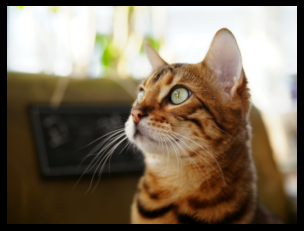

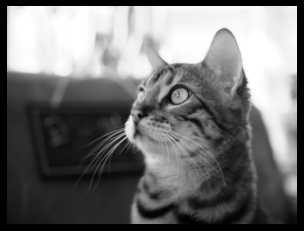

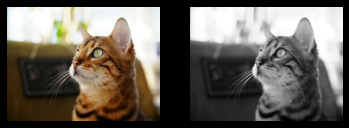

In [34]:
import matplotlib.pyplot as plt
import cv2

# matplotlib 라이브러리 : 함수 그래프, 차트, 히스토그램 등의 다양한 그리기 기능을 제공하는 파이썬 패키지
# 컬러 영상 출력 : 컬러 영상의 색상 정보가 RGB 순서여야 한다.
#            : cv2.imread() 함수로 불러온 영상의 색상 정보는 BGR 순서이므로 이를 RGB 순서로 변경해야 한다.
#            : 색상 정보의 순서 변경은 cv2.cvtColor() 함수를 이용한다.
# 그레이스케일 영상 출력 : matplotlib.pyplot 클래스의 함수 imshow() 함수에서 컬러맵을 cmap="gray"로 지정

# 컬러 영상 출력
image_BGR = cv2.imread('./ch01/cat.bmp')
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)  # 색상 정보의 순서를 BGR -> RGB로 바꿈

plt.axis('off')  # 축 정보 끄기
plt.imshow(image_RGB)
plt.show()

# 그레이스케일 영상 출력
image_GRAY = cv2.imread('./ch01/cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.axis('off')  # 축 정보 끄기
plt.imshow(image_GRAY, cmap='gray')
plt.show()

# 두 개의 영상을 함께 출력
plt.subplot(121), plt.axis('off'), plt.imshow(image_RGB)
plt.subplot(122), plt.axis('off'), plt.imshow(image_GRAY, cmap='gray')
plt.show()

## 4) 이미지 슬라이드 쇼